# CRISP-DM Phase 3: Data Preparation

## Missing Values

### Simple Imputer
    Univariate imputer for completing missing values with simple strategies.

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


### KNN Imputer
    Multivariate imputer that estimates missing features using nearest samples.

In [2]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Outlier Detection

### *Boxplot Approach*

min-max range: [26.00, 74.00]
2 outliers detected in column input1

min-max range: [32.00, 68.00]
0 outliers detected in column input2



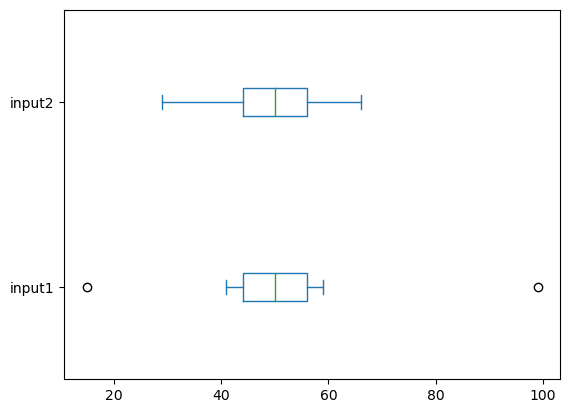

In [3]:
# import packages
import pandas as pd

# create a sample dataframe
my_df = pd.DataFrame({"input1": [15,41,44,47,50,53,56,59,99],
                      "input2": [29,41,44,47,50,53,56,59,66]})

my_df.plot(kind = "box", vert = False)

outlier_columns = ["input1", "input2"]

for column in outlier_columns:
    
    lower_quartile = my_df[column].quantile(0.25)
    upper_quartile = my_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    print(f"min-max range: [{min_border:.2f}, {max_border:.2f}]")
    
    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}\n")
    
    my_df.drop(outliers, inplace = True)

### *Standard Deviation Approach*

min-max range: [-14.31, 117.42]
0 outliers detected in column input1

min-max range: [16.82, 82.07]
0 outliers detected in column input2



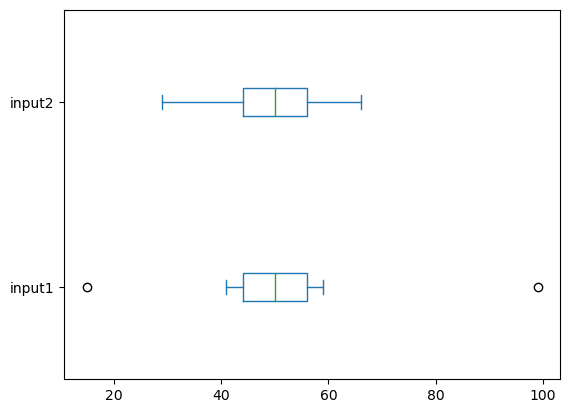

In [4]:
# import packages
import pandas as pd

# create a sample dataframe
my_df = pd.DataFrame({"input1": [15,41,44,47,50,53,56,59,99],
                      "input2": [29,41,44,47,50,53,56,59,66]})

my_df.plot(kind = "box", vert = False)

outlier_columns = ["input1", "input2"]

for column in outlier_columns:
    
    mean = my_df[column].mean()
    std_dev = my_df[column].std()
    
    min_border = mean - std_dev * 3
    max_border = mean + std_dev * 3
    print(f"min-max range: [{min_border:.2f}, {max_border:.2f}]")
    
    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}\n")
    
    my_df.drop(outliers, inplace = True)

## Data Transformation

### Range Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_, '\n')
print(scaler.transform(data), '\n')
print(scaler.transform([[2, 2]]))

MinMaxScaler()
[ 1. 18.] 

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]] 

[[1.5 0. ]]


### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
data = [[0, 1], [1, 2], [2, 3], [3, 4]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_, '\n')
print(scaler.transform(data), '\n')
print(scaler.transform([[2, 2]]))

StandardScaler()
[1.5 2.5] 

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]] 

[[ 0.4472136 -0.4472136]]


### Robust Scaler

In [7]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = RobustScaler()
print(transformer.fit(X))
transformer.transform(X)

RobustScaler()


array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## Feature Encoding

### One-Hot Encoding

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# encoding example
df = pd.read_csv("Data/encoding_data.csv")
print(df, "\n")
# one-hot encoding
df1 = pd.get_dummies(df, prefix=['Temp'], columns=['Temperature'])
print(df1, "\n")

  Temperature   Color  Target
0         Hot     Red       1
1        Cold  Yellow       1
2    Very Hot    Blue       1
3        Warm    Blue       0
4         Hot     Red       1
5        Warm  Yellow       0
6        Warm     Red       1
7         Hot  Yellow       0
8         Hot  Yellow       1
9        Cold  Yellow       1 

    Color  Target  Temp_Cold  Temp_Hot  Temp_Very Hot  Temp_Warm
0     Red       1          0         1              0          0
1  Yellow       1          1         0              0          0
2    Blue       1          0         0              1          0
3    Blue       0          0         0              0          1
4     Red       1          0         1              0          0
5  Yellow       0          0         0              0          1
6     Red       1          0         0              0          1
7  Yellow       0          0         1              0          0
8  Yellow       1          0         1              0          0
9  Yellow       1 

### Label Encoding

In [9]:
# label encoding
df2 = df.copy()
df2['Temp_label_encoded'] = LabelEncoder().fit_transform(df2.Temperature)
print(df2, "\n")

  Temperature   Color  Target  Temp_label_encoded
0         Hot     Red       1                   1
1        Cold  Yellow       1                   0
2    Very Hot    Blue       1                   2
3        Warm    Blue       0                   3
4         Hot     Red       1                   1
5        Warm  Yellow       0                   3
6        Warm     Red       1                   3
7         Hot  Yellow       0                   1
8         Hot  Yellow       1                   1
9        Cold  Yellow       1                   0 



### Ordinal Encoding

In [10]:
# ordinal encoding
df3 = df.copy()
Temp_dict = { 'Cold' : 1,
              'Warm' : 2,
              'Hot' : 3,
              'Very Hot' : 4}
df3['Temp_Ordinal'] = df3.Temperature.map(Temp_dict)
print(df3)


  Temperature   Color  Target  Temp_Ordinal
0         Hot     Red       1             3
1        Cold  Yellow       1             1
2    Very Hot    Blue       1             4
3        Warm    Blue       0             2
4         Hot     Red       1             3
5        Warm  Yellow       0             2
6        Warm     Red       1             2
7         Hot  Yellow       0             3
8         Hot  Yellow       1             3
9        Cold  Yellow       1             1


## Feature Selection

### *Data Generation*
We build a classification task using 3 informative features. The introduction of 2 additional redundant (i.e. correlated) features has the effect that the selected features vary depending on the cross-validation fold. The remaining features are non-informative as they are drawn at random.

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

In [12]:
# rows aand columns in the dataset
print(type(y))
X.shape

<class 'numpy.ndarray'>


(500, 15)

In [13]:
# create a pandas dataframe
import pandas as pd
df = pd.DataFrame(X, columns=['x'+str(i+1) for i in range(X.shape[1])])
df = pd.concat([df, pd.DataFrame(y, columns=['class'])], axis=1)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,class
0,0.731294,-0.216533,-0.340874,-0.148200,1.008335,-1.519974,-0.875155,-1.214217,-0.996134,-0.593520,-0.784221,0.662005,1.242494,-0.015533,0.366183,4
1,0.751100,0.644002,0.612681,-1.117313,0.927387,-0.583211,0.208233,0.071985,0.560383,-1.518869,-1.815889,0.317329,1.146432,-0.828459,0.764693,3
2,-0.331309,-0.553062,1.088335,-3.397496,-0.915364,-0.081549,1.546672,0.003616,0.170360,0.214406,1.222965,-1.877313,0.665589,2.126536,-2.046721,2
3,-0.220089,-1.082960,0.372484,1.645946,-1.444129,0.441780,-0.687050,0.007131,-0.289053,-0.015582,0.695707,-0.164745,0.203696,0.843476,-0.911910,6
4,-1.248949,-0.612639,-0.166153,0.928374,-1.674667,-1.381412,0.013985,0.107519,0.170197,-0.578942,-0.381290,-0.588813,-0.783499,0.973287,-1.151803,2


### *Feature Correlations*

<AxesSubplot:>

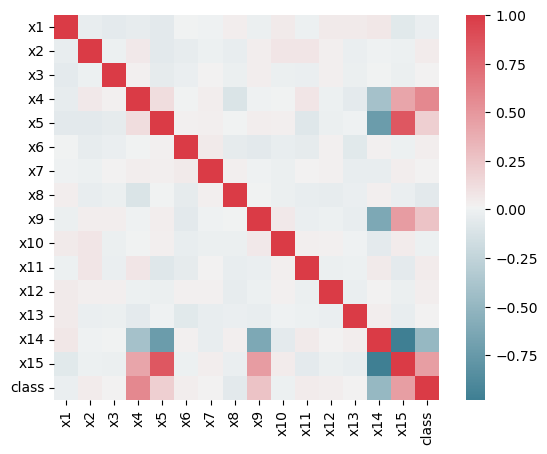

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7, 5))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### *Model Training and Selection*
We create the RFE object and compute the cross-validated scores. The scoring strategy “accuracy” optimizes the proportion of correctly classified samples.

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


### *Plot Number of Features VS. Cross-Validation Scores*

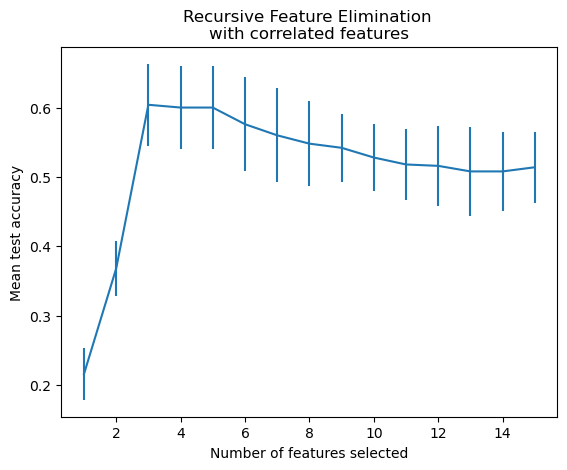

In [16]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()